<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Proyectos

Proyectos propuestos para Python Analytics<br>
v1.5

### Formato de entrega
Toda la etapa de entrenamiento del proyecto se debe realizar en un colab o nootebook que luego el alumno subierá a su repositorio de proyecto para que el profesor pueda evaluar los avances.<br>

__APROBACIÓN:__ El proyecto será aprobado cuando el modelo entrenado alcance la exactitud/condición planteada en el proyecto.<br>

### Predicción de enfermedades cardíacas
<img src="https://github.com/InoveAlumnos/proyecto_analytics_python/raw/main/heart.png" width="300" align="center">

- El objetivo es armar un clasificador binario que permita predecir si un paciente podría presentar o no enfermedades cardíacas.
- Deberá entrenar un modelo clasificador y varios algoritmos para clasificación. Por ejemplo, en el caso de seleccionar un RandomForest debe entrenar con distinto número de estimadores (distantas cantidad de árboles), pero a su vez entrenar distintos KNN o regresión logística, etc. Deberá compararlos utilizando la métrica adecuada y elegir el mejor modelo.
- Entre el dataset encontrará datos categóricos que requieren ser codificados, y datos numéricos para normalizar.
- A modo de análisis, debe identificar si el dataset se encuentra correctamente balanceado (entre pacientes con y sin enfermedad cardíaca), y como está balanceado el dataset en cuanto a género y edad (este análisis es unicamente a modo informativo).

#### Objetivo

El accuracy del modelo definitivo debe superar el 80% (0.8)

#### Como descargar el dataset

In [ ]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ejecutar:
if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv > heart.csv
    else:
        !wget heart.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv

--2024-05-07 18:17:17--  http://heart.csv/
Resolving heart.csv (heart.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘heart.csv’
--2024-05-07 18:17:17--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11323 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0.001s  

2024-05-07 18:17:17 (11.3 MB/s) - ‘heart.csv’ saved [11323/11323]

FINISHED --2024-05-07 18:17:17--
Total wall clock time: 0.5s
Downloaded: 1 files, 11K in 0.001s (11.3 MB/s)


In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv')

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_features = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


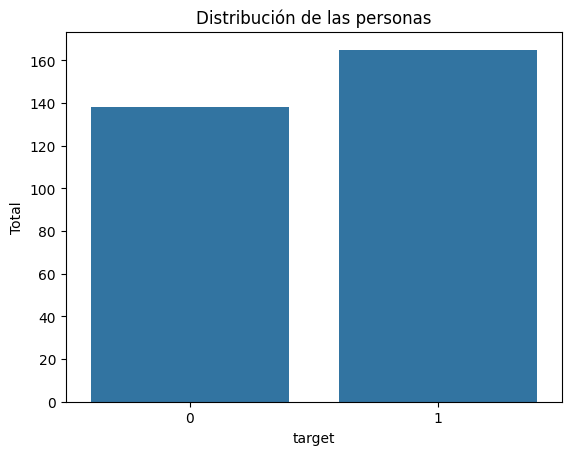

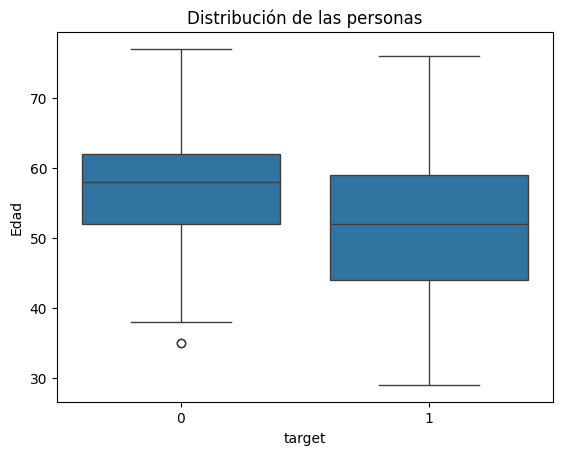

In [ ]:
import seaborn as sns

# Verificar el balanceo en la presencia de enfermedades cardíacas
sns.countplot(x='target', data=df)
plt.title('Distribución de las personas')
plt.ylabel('Total')
plt.show()

# Verificar el balanceo en términos de género y edad
sns.boxplot(x='target', y='age', data=df)
plt.title('Distribución de las personas')
plt.ylabel('Edad')
plt.show()


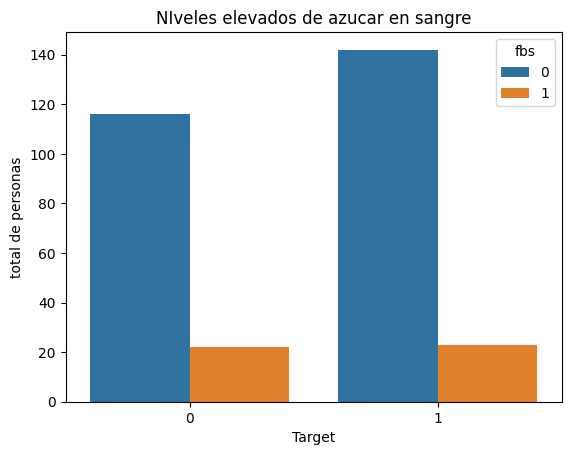

In [ ]:
sns.countplot(x='target', hue='fbs', data=df)


plt.title('NIveles elevados de azucar en sangre')
plt.xlabel('Target')
plt.ylabel('total de personas')

plt.show()

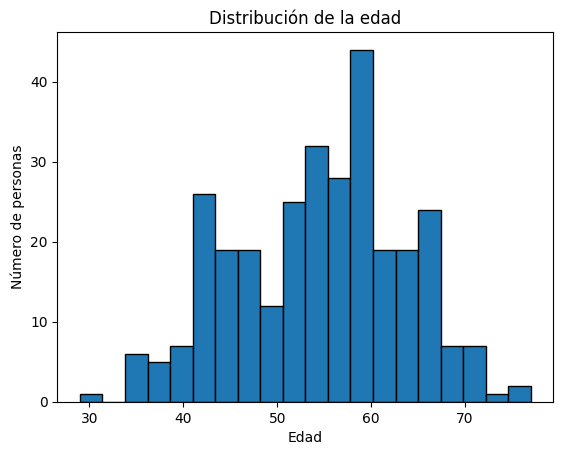

Media de la edad: 54.366336633663366
Mediana de la edad: 55.0
Desviación estándar de la edad: 9.082100989837857


In [ ]:
plt.hist(df['age'], bins=20, edgecolor='k')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Número de personas')

plt.show()

print("Media de la edad:", df['age'].mean())
print("Mediana de la edad:", df['age'].median())
print("Desviación estándar de la edad:", df['age'].std())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# dividir el dataset en entrenamiento y prueba
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenar y evaluar RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Accuracy de RandomForest: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# Entrenar y evaluar KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f"Accuracy de KNN: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

# Entrenar y evaluar Regresión Logística
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Accuracy de Regresión : {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))




Accuracy de RandomForest: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Accuracy de KNN: 0.6885245901639344
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

Accuracy de Regresión : 0.8852459016393442
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   m

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)


# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred, normalize=True)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


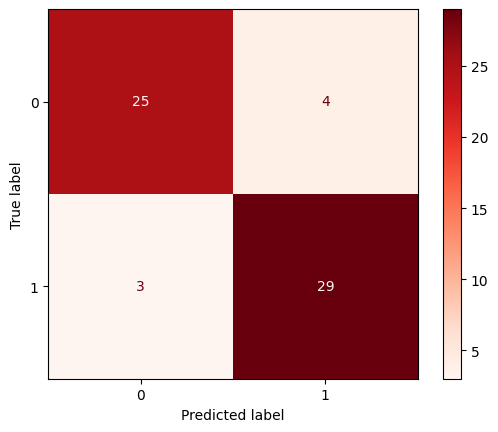

In [73]:
cm = confusion_matrix(y_test, y_pred_lr)

cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

cmd.plot(cmap=plt.cm.Reds)

plt.show()

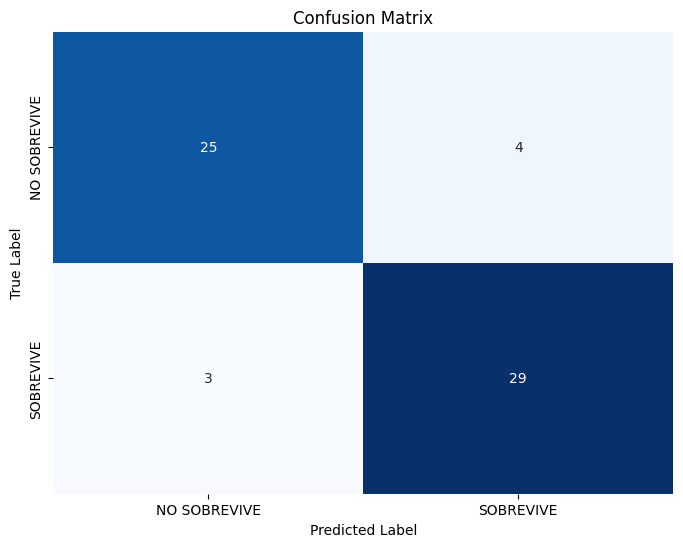

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Define display labels
display_labels = ['NO SOBREVIVE', 'SOBREVIVE']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=display_labels, yticklabels=display_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:


age =	47
sex	= 1
cp = 2
trestbps = 120
chol = 200
fbs	= 2
restecg	= 0
thalach	=135
exang	= 1
oldpeak	= 2.1
slope	= 0
ca = 1
thal = 1


# Crear el array de entrada
X_prueba = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])
# El sistema espera 1 fila y N columnas, hay que hacer reshape
X_prueba = X_prueba.reshape(1, -1)

# Obtener la predicción como una probabilidad
y_prueba = model.predict_proba(X_prueba)[0, 1]

if y_prueba >= 0:
    print('Vida!')
else:
    print('Muerte')

print('Probabilidad de haber sobrevivido:', y_prueba)



Vida!
Probabilidad de haber sobrevivido: 0.2258388452584798


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
